<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/Bai_2_Asian_and_Indian_Cuisine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Xác định một mẫu là cuisine của nước nào dựa vào công thức của mẫu đó

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file asian_indian_recipes, gồm hơn 2000 dòng và nhiều cột, là thông tin đã được chuyển sang dạng ma trận rời rạc



**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_csv(path+'data/asian_indian_recipes.csv',index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 65 to 57690
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


In [ ]:
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,...,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,indian,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,indian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,indian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
69,indian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.shape

(2448, 384)

**Đây là bài toán phân loại dựa trên dữ liệu, tất cả dữ liệu đêu đã được chuyển về dạng nhị phân => không cần phải chuẩn hóa dữ liệu => sử dụng function select model để lựa chọn thuật toán phù hợp**

In [ ]:
from importlib.machinery import SourceFileLoader
my_module = SourceFileLoader('my_func', path+'/my_functions.py').load_module()
my_module

<module 'my_func' from '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi//my_functions.py'>

In [ ]:
X = data.drop('cuisine',axis=1)
y = data['cuisine']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
res = my_module.select_models(X,y)
res

,model_name,accuracy
0,KNeighborsClassifier,0.608203
1,DecisionTreeClassifier,0.616372
2,RandomForestClassifier,0.681716
3,SVC,0.709496
4,GaussianNB,0.613381
5,LogisticRegression,0.723792


**Dựa vào kết quả thử nghiệm thì model LogisticRegression cho kết quả tốt nhất => chọn LogisticRegression để train**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.8908347927612376

In [ ]:
model.score(X_test,y_test)

0.7918367346938775

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
print("Test Accuracy=",round(accuracy_score(y_test,y_pred),2)*100,'%')

Test Accuracy= 79.0 %


**Trả lời câu 2:**
Model có độ chính xác cao cho cả train và test

**Trả lời câu 3:**

In [ ]:
y.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 94,   3,   9,  22,  10],
       [  1, 146,   2,   4,   5],
       [ 22,   3,  65,  23,   3],
       [ 13,   0,  12, 206,   3],
       [  4,   8,   3,   3,  71]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.7796933988874062, 0.7687299140236197, 0.7718727097388991, None)

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.7918367346938775, 0.7918367346938775, 0.7918367346938775, None)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['korean','indian','chinese','japanese','thai']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      korean       0.70      0.68      0.69       138
      indian       0.91      0.92      0.92       158
     chinese       0.71      0.56      0.63       116
    japanese       0.80      0.88      0.84       234
        thai       0.77      0.80      0.78        89

    accuracy                           0.79       735
   macro avg       0.78      0.77      0.77       735
weighted avg       0.79      0.79      0.79       735



**Model cho độ chính xác cao nhất với món ăn india và thấp nhất với china**

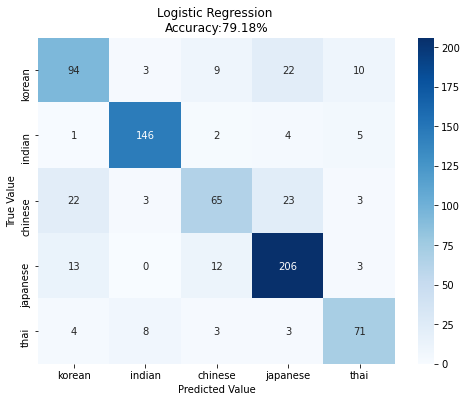

In [ ]:
cm_df = pd.DataFrame(cm, index= target_names, columns=target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Logistic Regression \nAccuracy:{0:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

**Model có độ chính xác cao, 79%**

Dự đoán món ăn của Japan và India có tỷ lệ chính xác cao nhất, thấp nhất là China và Thai

**Trả lời câu 4**

Nếu trong thành phần món ăn có cumin và fish nhưng khong có yogurt thì là món ăn của nước nào?

**Indian**

In [ ]:
X_new = pd.DataFrame(X[:1])
X_new[:] = 0
X_new[:][['cumin','fish']] = 1
y_new = model.predict(X_new)
y_new

array(['indian'], dtype=object)

**Trả lời câu 5**

nếu trong thành phần của món ăn có cumin nhưng không có “fish” và không có “soy_sauce” thì món ăn đó thường là món ăn của nước nào?

**Indian**

In [ ]:
X_new = pd.DataFrame(X[:1])
X_new[:] = 0
X_new[:][['cumin']] = 1
y_new = model.predict(X_new)
y_new

array(['indian'], dtype=object)

**Trả lời câu 6**

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 94,   3,   9,  22,  10],
       [  1, 146,   2,   4,   5],
       [ 22,   3,  65,  23,   3],
       [ 13,   0,  12, 206,   3],
       [  4,   8,   3,   3,  71]])

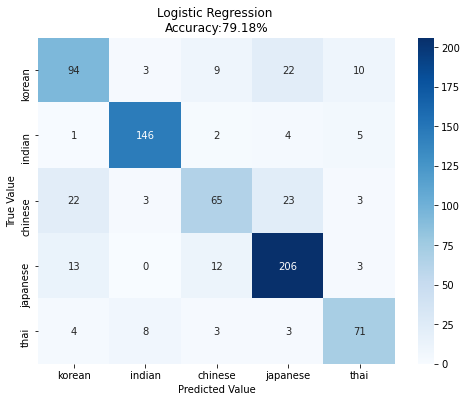

In [ ]:
cm_df = pd.DataFrame(cm, index= target_names, columns=target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Logistic Regression \nAccuracy:{0:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác

In [ ]:
print(206/(13+12+206+3)*100)

88.03418803418803


Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản?

In [ ]:
print(22/(94+3+9+22+10)*100)

15.942028985507244


Nước nào có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất ?

**Chinese**

In [ ]:
print('korean = ',1 - (94/(3+9+22+10+94)) )
print('indian = ',1- (146/(1+146+2+4+5)))
print('chinese = ',1- (65/(65+3+22+23+3)))
print('japanese = ',1- (206/(13+12+206+3)))
print('thai = ',1 - (71/(4+8+3+3+71)))

korean =  0.3188405797101449
indian =  0.07594936708860756
chinese =  0.43965517241379315
japanese =  0.11965811965811968
thai =  0.202247191011236
